<a href="https://colab.research.google.com/github/sammainahkinya1404/East-Africa-Young-Researchers-School-of-Advanced-Machine-Learning-2025/blob/main/BDT_Classification_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  EASY-ML 2025 Boosted Decision Tree

We'll walk through training:
- Logistic Regression (baseline)
- Decision Trees
- AdaBoost
- Gradient Boosting
- XGBoost

Each model will be visualized and evaluated step-by-step.


In [1]:
# Install if using Colab
try:
    import google.colab
    !pip install -q xgboost
except:
    pass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import xgboost as xgb
from sklearn.datasets import make_classification, make_moons, make_circles


##  Generate Datasets

In [ ]:
# Create 3 synthetic datasets
datasets = {
    "Linearly Separable Dataset": make_classification(n_samples=500, n_features=2,
                                               n_redundant=0, n_informative=2,
                                               n_clusters_per_class=1, class_sep=2.0, random_state=1),
    "Moons Dataset": make_moons(n_samples=500, noise=0.25, random_state=2),
    "Circles Dataset": make_circles(n_samples=500, factor=0.5, noise=0.2, random_state=3)
}


## Visualize the Generated datasets

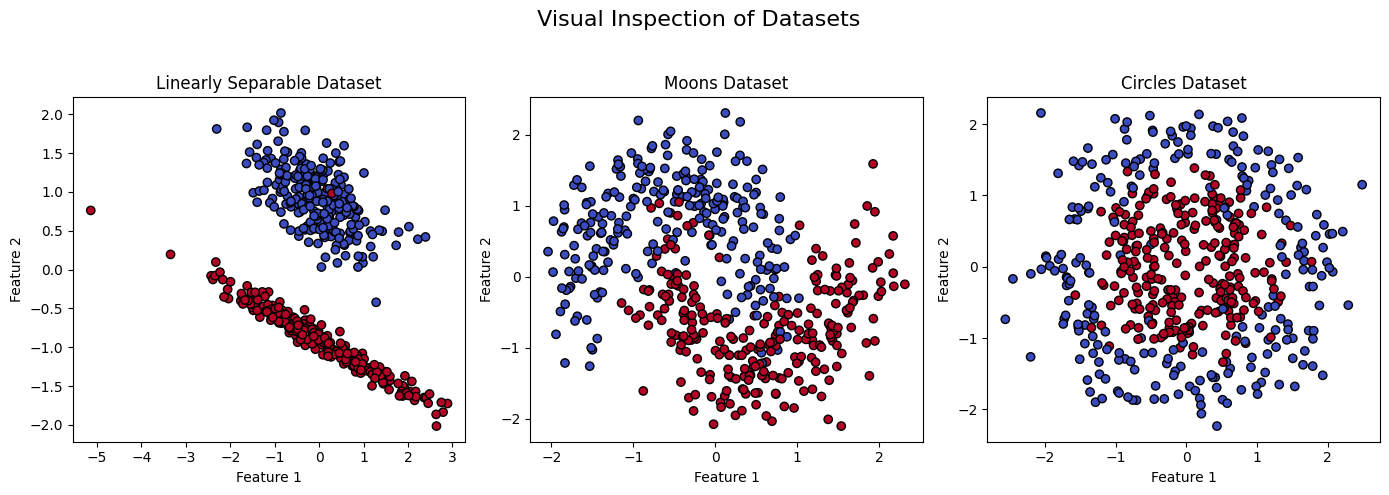

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, (name, (X, y)) in zip(axes, datasets.items()):
    X_scaled = StandardScaler().fit_transform(X)  # standardize for better display
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    ax.set_title(name)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.suptitle(" Visual Inspection of Datasets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Helper function to plot decision boundaries

In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size for mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


##  Step-by-step Model Expansion and Visualization
We will progressively add models to observe how each contributes to better decision boundaries.

### Baseline + Decision Trees

In this step, we will:
- Load and standardize 3 synthetic datasets:
  - **Linearly Separable** (easy)
  - **Moons** (moderately non-linear)
  - **Circles** (highly non-linear)
- Train a progressively expanding set of models:
  Baseline, Decision, Trees
- Plot and compare decision boundaries for all models in each dataset.
- Annotate accuracy scores on each plot to track improvement.



### Stage: Baseline + Decision Trees ###

## Dataset: Linearly Separable Dataset


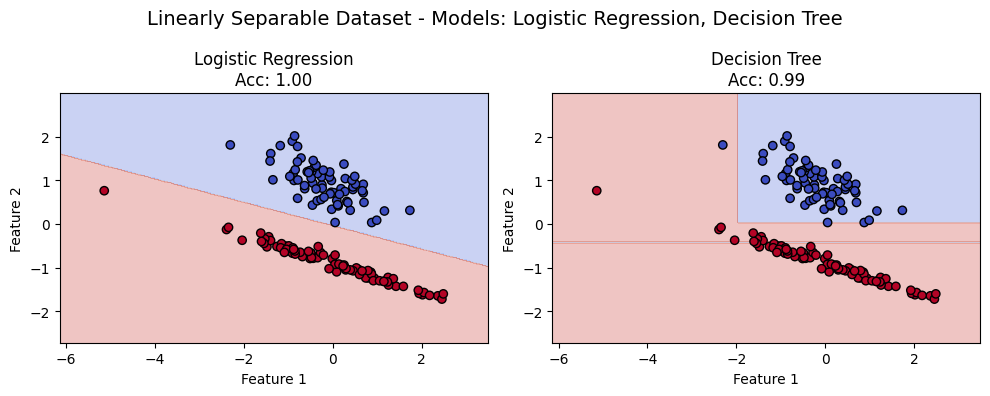


## Dataset: Moons Dataset


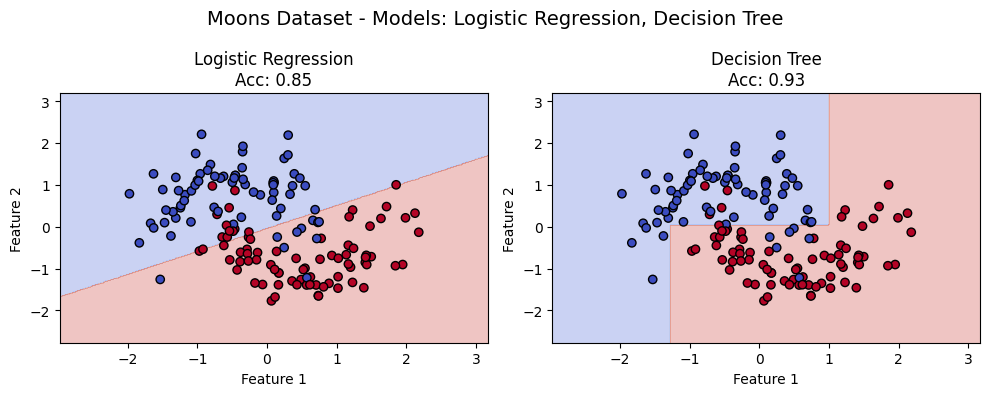


## Dataset: Circles Dataset


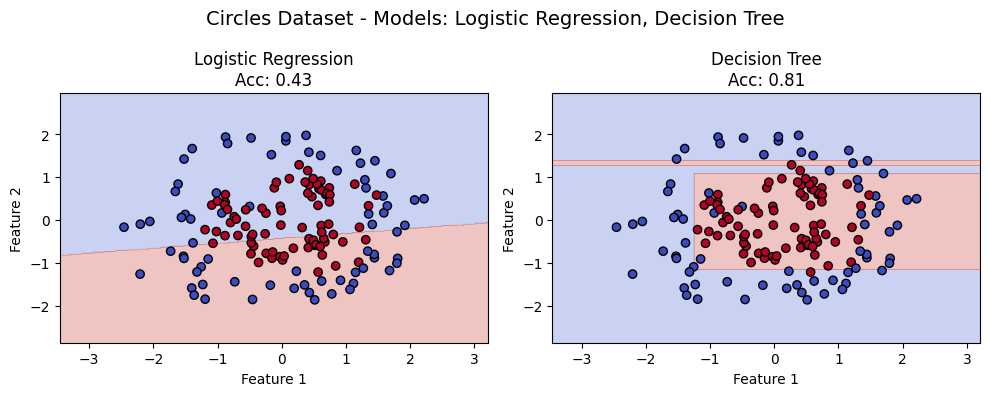

In [ ]:
print("### Stage: Baseline + Decision Trees ###")

# Define all available models with their parameters
selected_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each dataset (Linearly Separable, Moons, Circles)
for dataset_name, (X, y) in datasets.items():
    print(f"\n## Dataset: {dataset_name}")
# Standardize features for better model performance
    X = StandardScaler().fit_transform(X)
# Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a horizontal row of subplots for each model
    fig, axs = plt.subplots(1, len(['Logistic Regression', 'Decision Tree']), figsize=(5 * len(['Logistic Regression', 'Decision Tree']), 4))
    for i, model_name in enumerate(['Logistic Regression', 'Decision Tree']):
# Define all available models with their parameters
        model = selected_models[model_name]
# Train the current model on the training set
        model.fit(X_train, y_train)
# Evaluate model performance on test data
        acc = accuracy_score(y_test, model.predict(X_test))
        plt.sca(axs[i])
# Plot decision boundary and overlay accuracy
        plot_decision_boundary(model, X_test, y_test, f"{model_name}\nAcc: {acc:.2f}")
    fig.suptitle(dataset_name + " - Models: " + ", ".join(['Logistic Regression', 'Decision Tree']), fontsize=14)
    plt.tight_layout()
    plt.show()


###  AdaBoost

In this step, we will:
- Load and standardize 3 synthetic datasets:
  - **Linearly Separable** (easy)
  - **Moons** (moderately non-linear)
  - **Circles** (highly non-linear)
- Train a progressively expanding set of models:
  AdaBoost
- Plot and compare decision boundaries for all models in each dataset.
- Annotate accuracy scores on each plot to track improvement.



### Stage: + AdaBoost ###

## Dataset: Linearly Separable Dataset


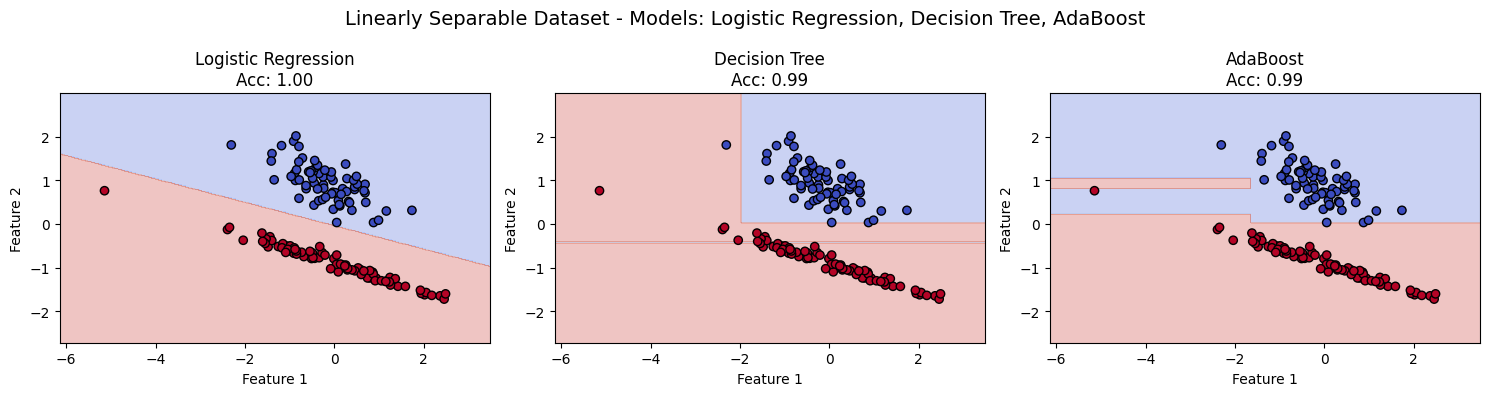


## Dataset: Moons Dataset


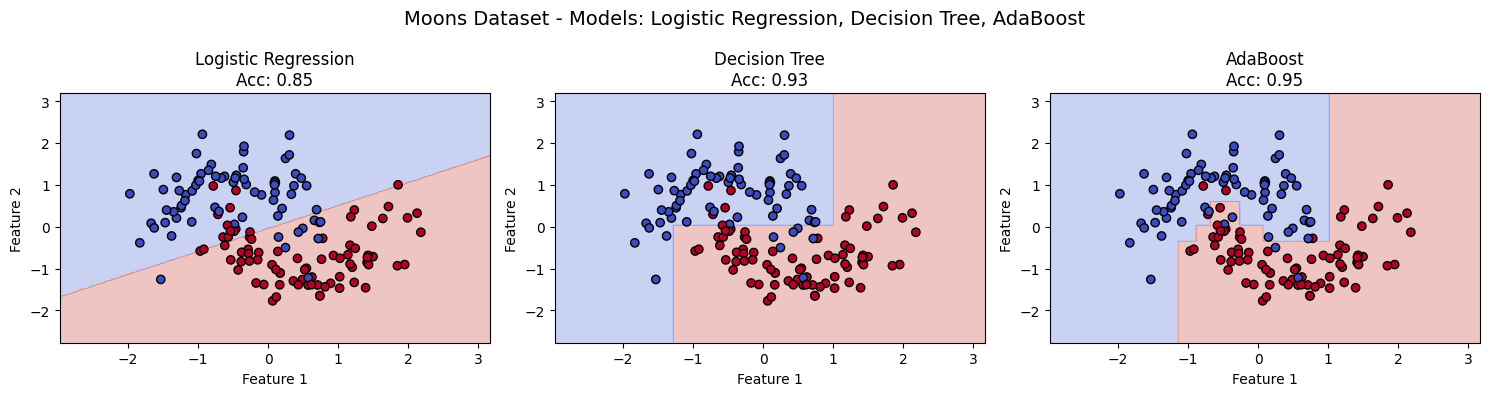


## Dataset: Circles Dataset


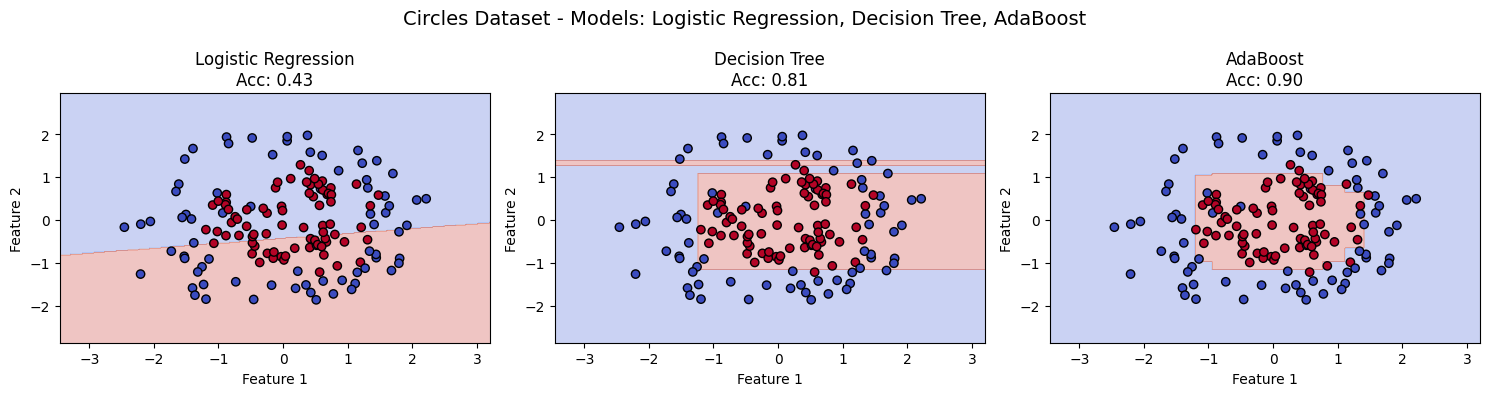

In [ ]:
print("### Stage: + AdaBoost ###")
# Define all available models with their parameters
selected_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each dataset (Linearly Separable, Moons, Circles)
for dataset_name, (X, y) in datasets.items():
    print(f"\n## Dataset: {dataset_name}")
# Standardize features for better model performance
    X = StandardScaler().fit_transform(X)
# Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a horizontal row of subplots for each model
    fig, axs = plt.subplots(1, len(['Logistic Regression', 'Decision Tree', 'AdaBoost']), figsize=(5 * len(['Logistic Regression', 'Decision Tree', 'AdaBoost']), 4))
    for i, model_name in enumerate(['Logistic Regression', 'Decision Tree', 'AdaBoost']):
# Define all available models with their parameters
        model = selected_models[model_name]
# Train the current model on the training set
        model.fit(X_train, y_train)
# Evaluate model performance on test data
        acc = accuracy_score(y_test, model.predict(X_test))
        plt.sca(axs[i])
# Plot decision boundary and overlay accuracy
        plot_decision_boundary(model, X_test, y_test, f"{model_name}\nAcc: {acc:.2f}")
    fig.suptitle(dataset_name + " - Models: " + ", ".join(['Logistic Regression', 'Decision Tree', 'AdaBoost']), fontsize=14)
    plt.tight_layout()
    plt.show()


###  Gradient Boosting

In this step, we will:
- Load and standardize 3 synthetic datasets:
  - **Linearly Separable** (easy)
  - **Moons** (moderately non-linear)
  - **Circles** (highly non-linear)
- Train a progressively expanding set of models:
  Gradient, Boosting
- Plot and compare decision boundaries for all models in each dataset.
- Annotate accuracy scores on each plot to track improvement.

This allows students to see how adding more sophisticated models improves classification capability.


### Stage: + Gradient Boosting ###

## Dataset: Linearly Separable Dataset


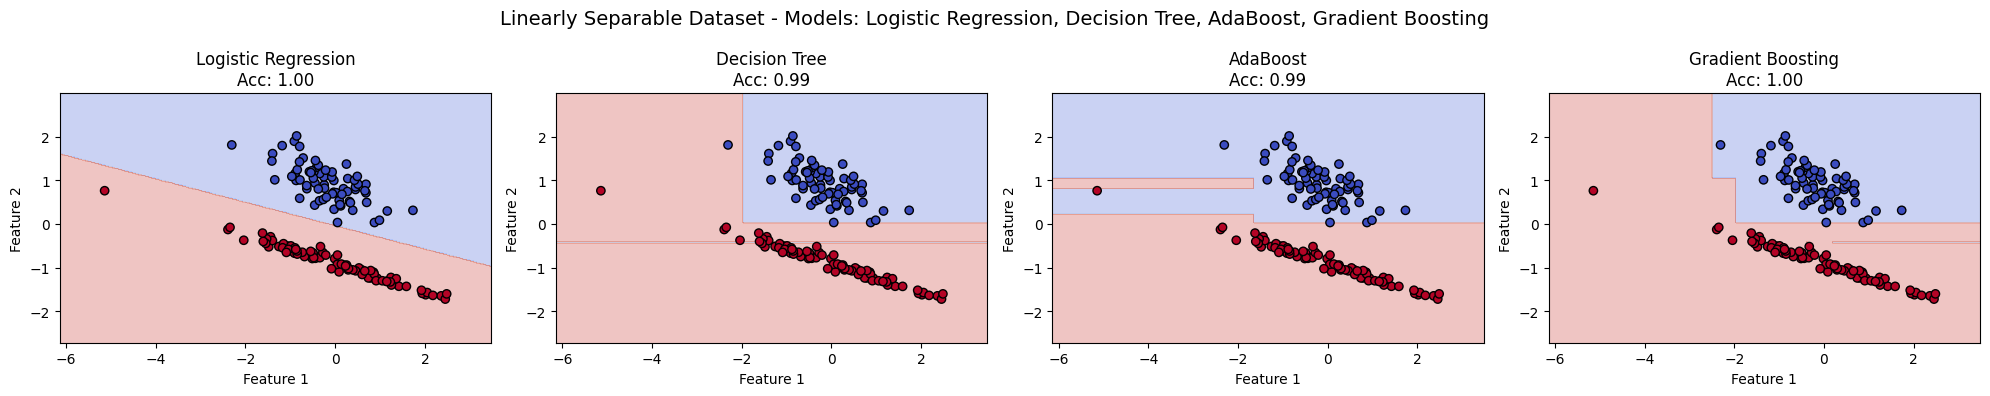


## Dataset: Moons Dataset


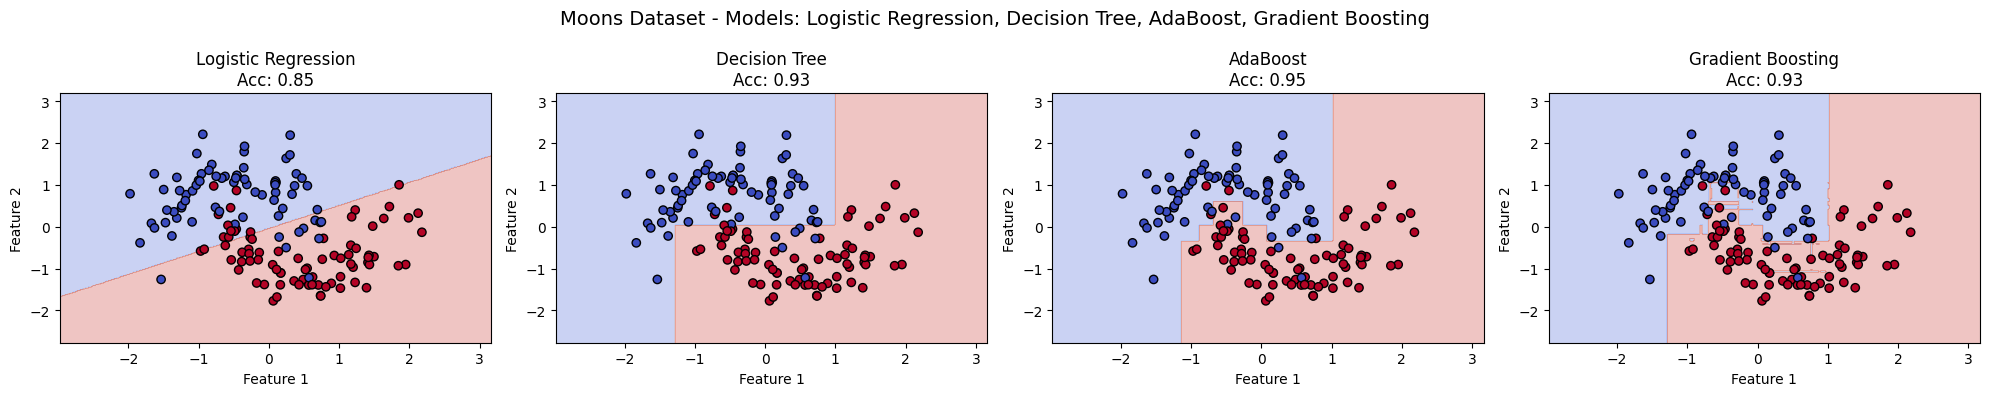


## Dataset: Circles Dataset


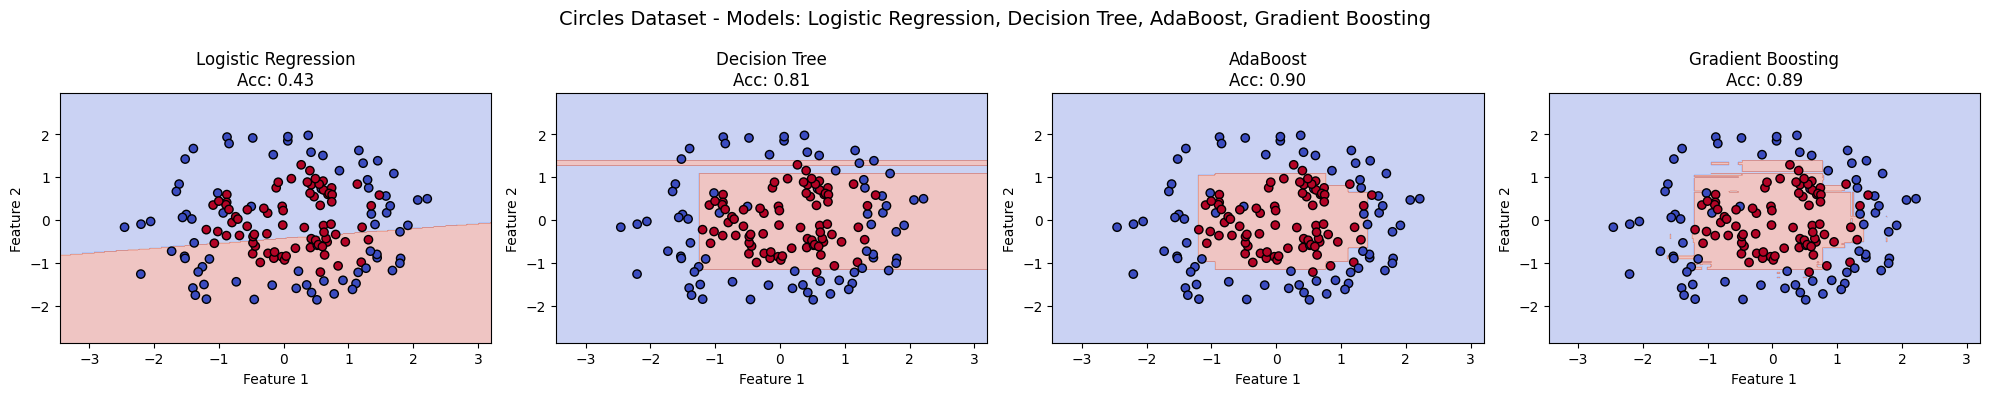

In [ ]:
print("### Stage: + Gradient Boosting ###")
# Define all available models with their parameters
selected_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each dataset (Linearly Separable, Moons, Circles)
for dataset_name, (X, y) in datasets.items():
    print(f"\n## Dataset: {dataset_name}")
# Standardize features for better model performance
    X = StandardScaler().fit_transform(X)
# Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a horizontal row of subplots for each model
    fig, axs = plt.subplots(1, len(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']), figsize=(5 * len(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']), 4))
    for i, model_name in enumerate(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']):
# Define all available models with their parameters
        model = selected_models[model_name]
# Train the current model on the training set
        model.fit(X_train, y_train)
# Evaluate model performance on test data
        acc = accuracy_score(y_test, model.predict(X_test))
        plt.sca(axs[i])
# Plot decision boundary and overlay accuracy
        plot_decision_boundary(model, X_test, y_test, f"{model_name}\nAcc: {acc:.2f}")
    fig.suptitle(dataset_name + " - Models: " + ", ".join(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']), fontsize=14)
    plt.tight_layout()
    plt.show()


###  XGBoost

In this step, we will:
- Load and standardize 3 synthetic datasets:
  - **Linearly Separable** (easy)
  - **Moons** (moderately non-linear)
  - **Circles** (highly non-linear)
- Train a progressively expanding set of models:
  XGBoost
- Plot and compare decision boundaries for all models in each dataset.
- Annotate accuracy scores on each plot to track improvement.

This allows students to see how adding more sophisticated models improves classification capability.


### Stage: + XGBoost ###

## Dataset: Linearly Separable Dataset


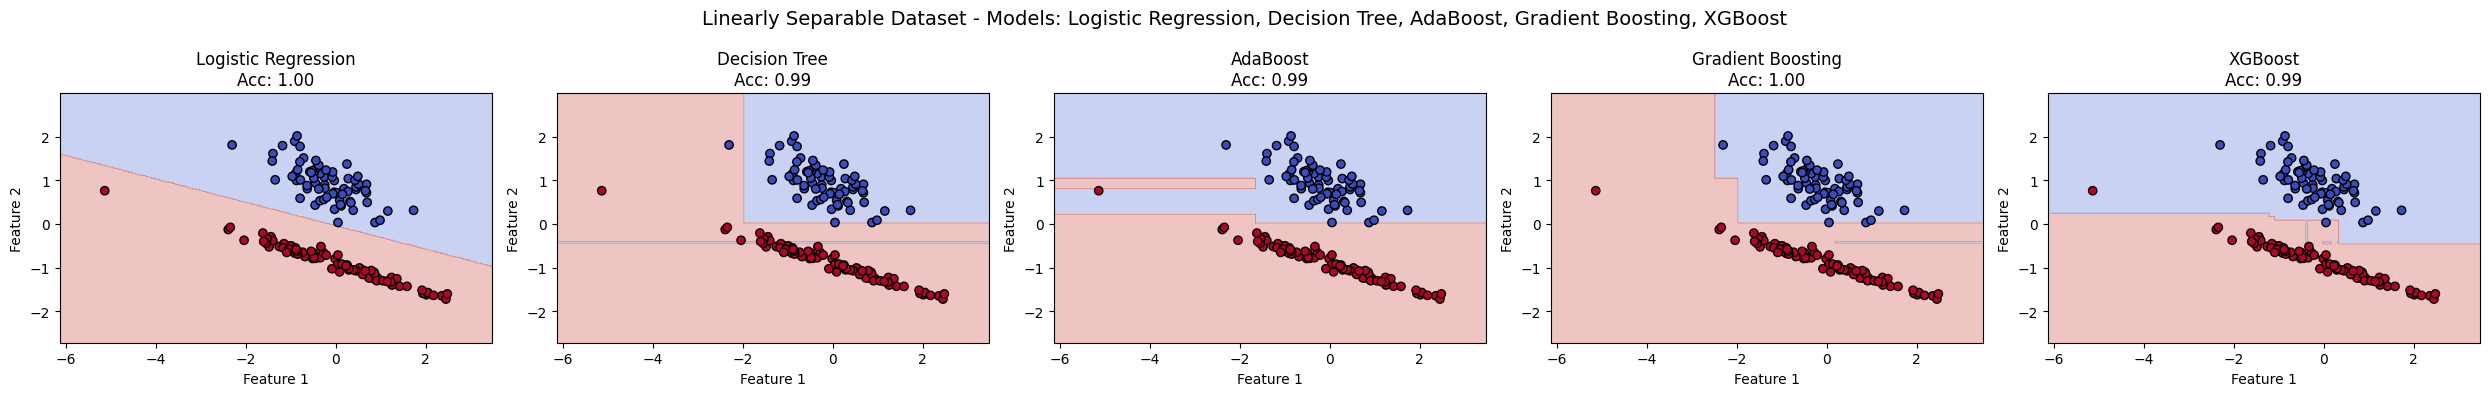


## Dataset: Moons Dataset


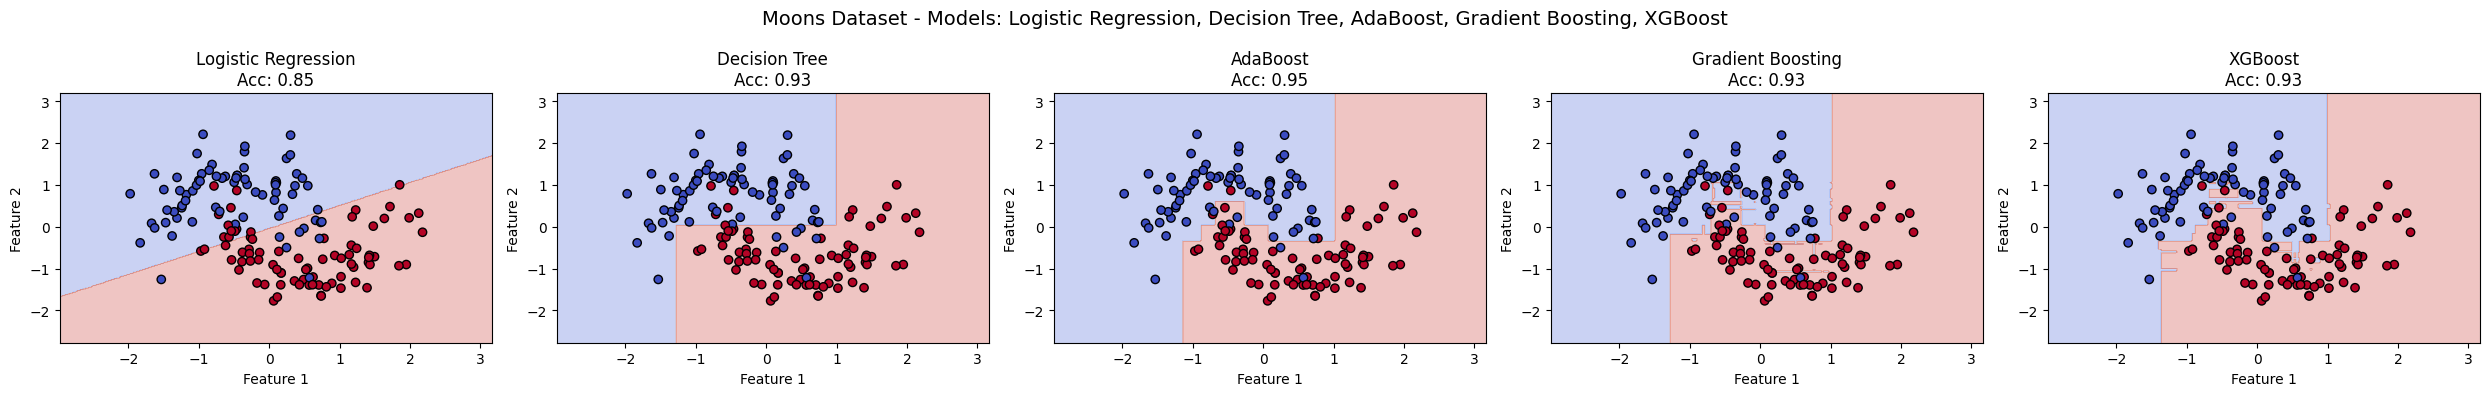


## Dataset: Circles Dataset


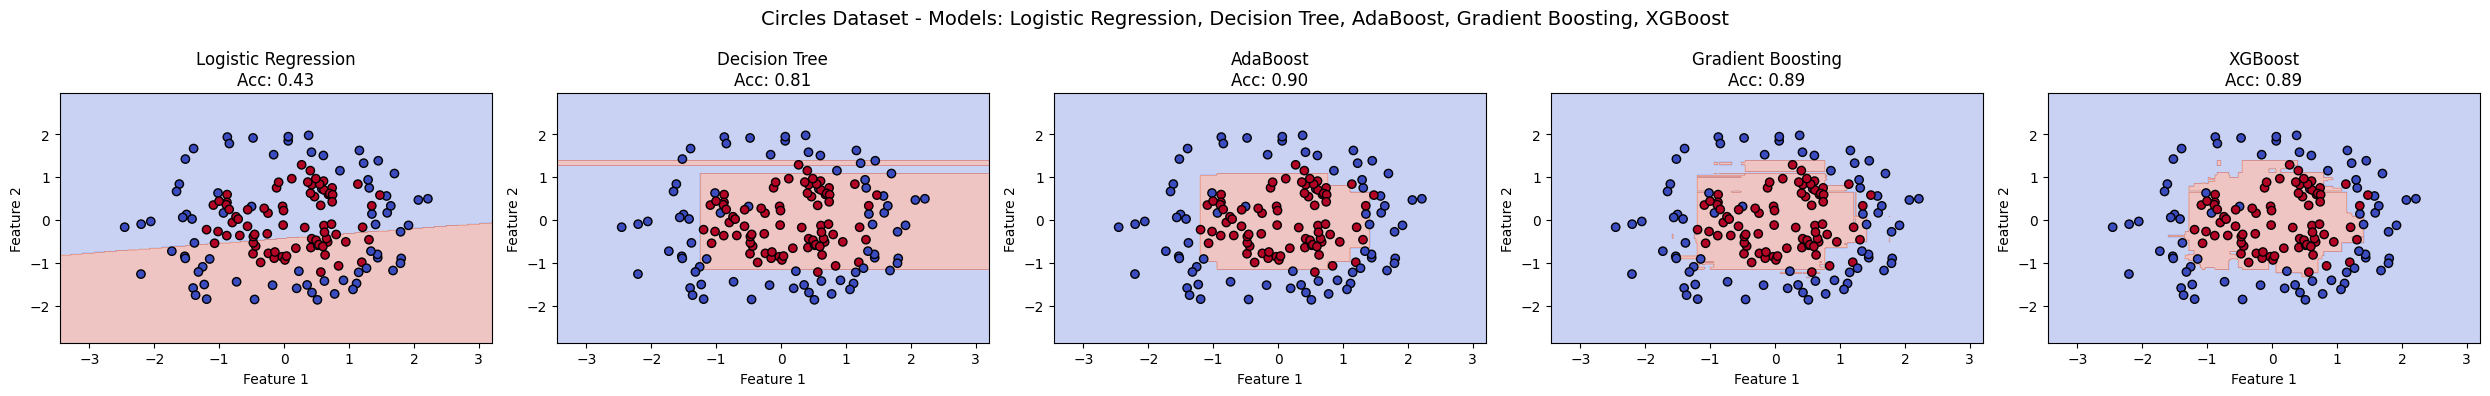

In [ ]:
print("### Stage: + XGBoost ###")

# Define all available models with their parameters
selected_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier( eval_metric='logloss')
}

# Loop through each dataset (Linearly Separable, Moons, Circles)
for dataset_name, (X, y) in datasets.items():
    print(f"\n## Dataset: {dataset_name}")
# Standardize features for better model performance
    X = StandardScaler().fit_transform(X)
# Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a horizontal row of subplots for each model
    fig, axs = plt.subplots(1, len(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']), figsize=(5 * len(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']), 4))
    for i, model_name in enumerate(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']):
# Define all available models with their parameters
        model = selected_models[model_name]
# Train the current model on the training set
        model.fit(X_train, y_train)
# Evaluate model performance on test data
        acc = accuracy_score(y_test, model.predict(X_test))
        plt.sca(axs[i])
# Plot decision boundary and overlay accuracy
        plot_decision_boundary(model, X_test, y_test, f"{model_name}\nAcc: {acc:.2f}")
    fig.suptitle(dataset_name + " - Models: " + ", ".join(['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']), fontsize=14)
    plt.tight_layout()
    plt.show()
